In [1]:
import numpy as np
import pandas as pd
import pickle
from pathlib import Path
from os import path
import librosa
import librosa.display
from sklearn.model_selection import train_test_split

import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

import cv2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
def resize_all(images_2d, wanted_shape):
    res_images = []
    for image in images_2d:
        resized = cv2.resize(image[0], dsize=wanted_shape)
        #print(resized.shape)
        res_images.append([resized])
    return res_images

def normalize_and_pca(images_2d, variance, normalize_only=False, pca_only=False):
    orig_x = images_2d[0][0].shape[0]
    orig_y = images_2d[0][0].shape[1]
    image_length = orig_x * orig_y
    images_1d = []
    
    for image in images_2d:
        images_1d.append(image[0].reshape((image_length)))
    
    data_encoded = images_1d
    
    # normalize
    if not pca_only:
        data_encoded = preprocessing.normalize(data_encoded)

        if normalize_only:
            images_2d = []
            for i in range(len(data_encoded)):
                images_2d.append([data_encoded[i].reshape(orig_x, orig_y)])
            return images_2d
    
    # pca
    pca = PCA(n_components=variance) # Used instead of k to compute minimum number of dimensions to preserve % of variance
    X_reduced = pca.fit(data_encoded).transform(data_encoded)
    X_recovered = pca.inverse_transform(X_reduced)
    
    images_2d = []
    for i in range(len(X_recovered)):
        images_2d.append([X_recovered[i].reshape(orig_x, orig_y)])
    return images_2d
    
def mel_spect(filepath):
    y, sr = librosa.load(filepath)
    mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
    #librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
    return mel_spect

## GTZAN

In [3]:
X = []
labels = []
dir_name = 'genres/'
for path in Path(dir_name).rglob('*.wav'):
    x = mel_spect(path)

    y_padding = 660 - x.shape[1]
    d = np.zeros((128, y_padding))
    x = np.hstack((x, d))

    print(x.shape)
    assert(x.shape == (128, 660))

    X.append(np.array([x]))
    labels.append(path.name.split('.')[0])

# Y to int label
Y = []
unique_labels = list(np.unique(labels))
for i, y in enumerate(labels):
    Y.append(unique_labels.index(y))

(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)

(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)
(128, 660)

In [4]:
print(np.unique(labels))

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [5]:
X_resized = resize_all(X, (165, 32))

In [6]:
#X_pca = normalize_and_pca(np.array(X), variance=0.3)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_resized, Y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

train = []
for i in range(len(X_train)):
    sample = (X_train[i], y_train[i])
    train.append(sample)
    
test = []
for i in range(len(X_test)):
    sample = (X_test[i], y_test[i])
    test.append(sample)

800
200


In [9]:
pickle.dump(train, open('data/GTZAN_resized.train', 'wb'))
pickle.dump(test, open('data/GTZAN_resized.test', 'wb'))

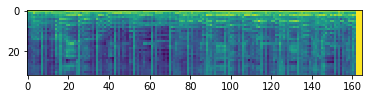

In [10]:
plt.imshow(train[50][0][0], interpolation='nearest')
plt.show()

## FMA

In [ ]:
X = []
labels = []
dir_name = 'raw_data/fma/fma_medium'

try:
    for path in Path(dir_name).rglob('*.wav'):
        print(path)
        try:
            x = mel_spect(path)

            y_padding = 660 - x.shape[1]
            d = np.zeros((128, y_padding))
            x = np.hstack((x, d))

            #print(x.shape)
            assert(x.shape == (128, 660))

            X.append(np.array([x]))
            labels.append(path.name.split('.')[0])
        except Exception as e:
            print('failed')
            print(e)
            print(path)

except KeyboardInterrupt:
    # Y to int label
    Y = []
    unique_labels = list(np.unique(labels))
    for i, y in enumerate(labels):
        Y.append(unique_labels.index(y))

In [ ]:
len(X)

In [ ]:
pickle.dump(X, open('fma_X.p', 'wb'))
pickle.dump(labels, open('fma_labels.p', 'wb'))

In [ ]:
test = pickle.load(open('fma_X.p', 'rb'))

In [ ]:
print(len(test))